*italicized text*# Loading Dataset & Importing Libraries

In [ ]:
# Will need to upload Social_Network_Ads.csv everytime you run a new Google Colab session
# Run the code below and it will prompt you to upload the csv file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
import matplotlib.pyplot as plt

from scipy.special import logit

import seaborn as sns

import numpy as np

from sklearn.preprocessing import StandardScaler # to scale the dataset
import statsmodels.api as sm # for logistic regression

from sklearn.feature_selection import RFE # feature selection method
from sklearn.linear_model import LogisticRegression


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv', header = 0, sep = ',')
sns.set_style("darkgrid")

# Data Exploration

In [ ]:
#We have 400 rows and 5 columns
df.shape

(400, 5)

In [ ]:
# explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
duplicate_rows = df[df.duplicated('User ID')]
print("Duplicate Rows based on User ID are:", duplicate_rows, sep='\n')

Duplicate Rows based on User ID are:
Empty DataFrame
Columns: [User ID, Gender, Age, EstimatedSalary, Purchased]
Index: []


No duplicates were found on dataset.

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#There are no null values
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Experiment was done for ages between 18 and 60 years old
df.Age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [ ]:
df_age = df.copy()
df_age['Age_range'] = pd.cut(df_age['Age'], bins = [-np.inf, 20, 30, 40, 50, +np.inf], labels = ['19', '20','30', '40', '50'])

In [ ]:
df_age.Age_range.value_counts()

30    142
40     98
20     92
50     49
19     19
Name: Age_range, dtype: int64

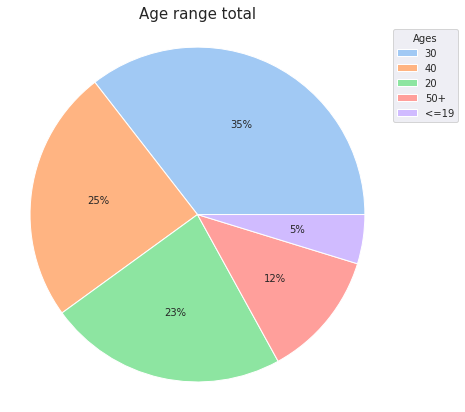

In [ ]:
colors = sns.color_palette('pastel')
label = ['30','40', '20', '50+', '<=19']
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(df_age.Age_range.value_counts(), autopct='%0.0f%%', colors = colors, radius=1.1) # pie chart
ax.legend(label,
          title ="Ages",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0, 1))
 
ax.set_title('Age range total', fontsize= 15, loc= 'center')
plt.show()

From the Pie Chart we can see that the bigger proportion of people was in their 30s (35%), followed by people in their 40s (25%) and 20s (23%)  

In [ ]:
#Of the 400 people, 204 were female and 196 were male.
df_counts_gender = df.Gender.value_counts()
df_counts_gender


Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
x = (196/400)*100
x

49.0

In [ ]:
x = (204/400)*100
x

51.0

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


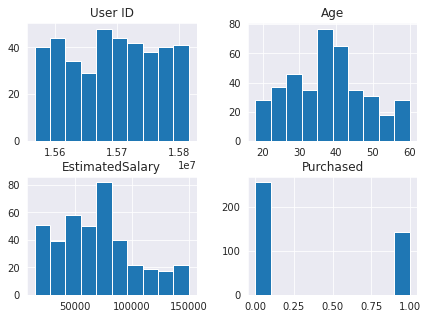

In [ ]:
# plot histograms of the individual columns
df.hist(figsize=(7,5));

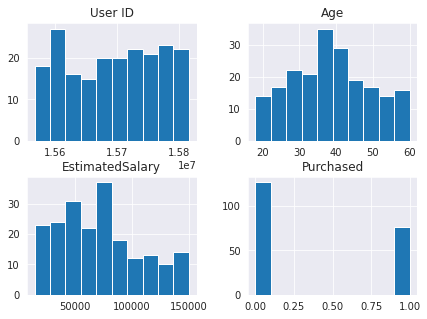

In [ ]:
# look at distributions for each gender

# distributions for Female
df[df['Gender']=='Female'].hist(figsize=(7,5));

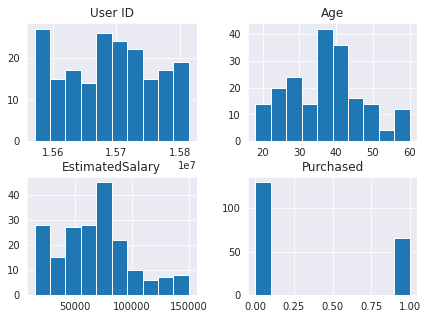

In [ ]:
# distributions for Male
df[df['Gender']=='Male'].hist(figsize=(7,5));

In [ ]:
df_female = df[df['Gender']=='Female'].copy()
df_female = df_female.drop(['Gender', 'Age', 'Purchased'], axis=1)
df_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 2 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          204 non-null    int64
 1   EstimatedSalary  204 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


In [ ]:
df_female['EstimatedSalary'].unique()

array([ 43000,  57000,  84000, 150000,  65000,  80000,  52000,  29000,
        49000,  22000,  30000, 137000,  16000,  44000,  28000,  72000,
        31000,  17000,  51000,  54000,  89000,  32000,  83000,  23000,
        58000,  55000,  48000, 117000,  66000,  82000,  63000,  68000,
        27000, 113000,  87000,  62000, 118000,  85000, 116000,  25000,
        37000,  86000, 149000,  21000,  35000,  71000,  75000,  61000,
        59000,  96000,  15000,  50000, 135000,  33000,  69000,  47000,
        34000,  60000,  41000,  26000,  79000,  36000, 134000, 101000,
       130000, 114000, 142000,  42000, 108000, 126000, 147000, 112000,
       143000,  88000, 104000, 146000, 122000,  97000,  39000,  90000,
        95000, 131000,  77000, 125000, 144000, 133000,  76000,  38000,
        93000, 138000,  78000,  70000, 141000, 107000, 119000,  46000,
        73000,  74000,  53000, 139000,  45000,  20000])

In [ ]:
df_female['Salary_Category'] = pd.cut(df_female['EstimatedSalary'], bins = [-np.inf, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 150000], labels = ['10000-19000','20000-39000', '40000-59000', '60000-79000', '80000-99000','100000-119000','120000-139000','140000+'])

In [ ]:
df_female.head()

,User ID,EstimatedSalary,Salary_Category
2,15668575,43000,40000-59000
3,15603246,57000,40000-59000
6,15598044,84000,80000-99000
7,15694829,150000,140000+
9,15727311,65000,60000-79000


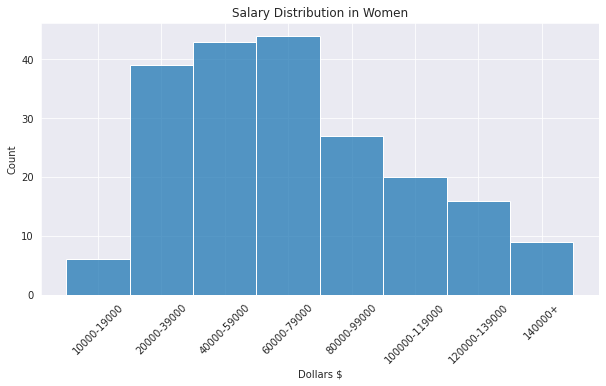

In [ ]:
color = sns.color_palette(as_cmap=True)
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df_female, x = "Salary_Category", bins=50, ax=ax, element="bars")
ax.set_xlabel('Dollars $')
ax.set_ylabel('Count')
ax.set_title('Salary Distribution in Women');
plt.xticks(rotation=45)
fig.show()

The Salary distribution in Women shows that the bigger groups have an income from 20.000 to 79.000 Dollars

In [ ]:
df_female.EstimatedSalary.describe()

count       204.000000
mean      71759.803922
std       35595.236189
min       15000.000000
25%       44000.000000
50%       70500.000000
75%       90750.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [ ]:
df_male = df[df['Gender']=='Male'].copy()
df_male = df_male.drop(['Gender', 'Age', 'Purchased'], axis=1)
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 398
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          196 non-null    int64
 1   EstimatedSalary  196 non-null    int64
dtypes: int64(2)
memory usage: 4.6 KB


In [ ]:
df_male['EstimatedSalary'].unique()

array([ 19000,  20000,  76000,  58000,  33000,  86000,  18000,  82000,
        80000,  25000,  26000,  28000,  22000,  41000,  23000,  43000,
        74000,  90000,  27000,  49000, 108000,  15000,  79000, 135000,
        87000, 120000, 112000,  52000,  42000,  88000,  55000,  81000,
        50000, 123000,  73000,  59000,  72000,  89000,  61000,  57000,
        75000,  53000,  65000,  32000,  17000,  31000,  63000, 107000,
        85000,  45000,  47000,  30000, 100000,  38000, 148000, 115000,
        16000,  66000,  84000,  70000,  39000, 150000,  78000, 143000,
        91000, 144000, 102000, 133000, 149000, 106000,  71000, 141000,
       134000,  77000, 117000,  54000, 125000,  96000,  60000, 118000,
        51000, 122000, 105000,  99000,  34000, 129000, 104000,  83000,
       130000,  64000])

In [ ]:
df_male['Salary_Category'] = pd.cut(df_male['EstimatedSalary'], bins = [-np.inf, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 150000], labels = ['10000-19000','20000-39000', '40000-59000', '60000-79000', '80000-99000','100000-119000','120000-139000','140000+'])

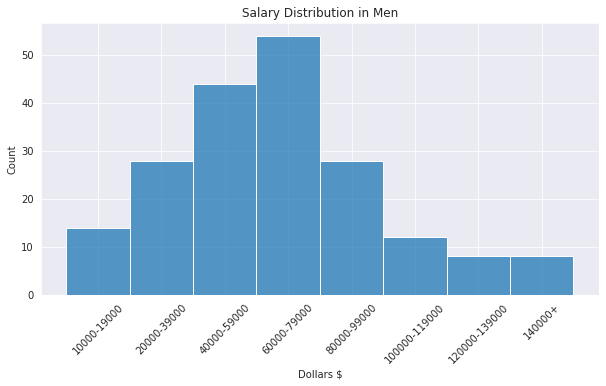

In [ ]:
color = sns.color_palette(as_cmap=True)
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df_male, x = "Salary_Category", bins=50, ax=ax, element="bars")
ax.set_xlabel('Dollars $')
ax.set_ylabel('Count')
ax.set_title('Salary Distribution in Men');
plt.xticks(rotation=45)
fig.show()

In the case of Salary distribution in Men the income on the bogger groups is between 40.000 to 79.000 Dollars.

In [ ]:
df_male.EstimatedSalary.describe()

count       196.000000
mean      67642.857143
std       32421.819181
min       15000.000000
25%       43000.000000
50%       68000.000000
75%       86000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [ ]:
df_combine = df.copy()
df_combine = df_combine.drop(['Age', 'Purchased'], axis=1)

In [ ]:
df_combine['Salary_Category'] = pd.cut(df_combine['EstimatedSalary'], bins = [-np.inf, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 150000], labels = ['10000-19000','20000-39000', '40000-59000', '60000-79000', '80000-99000','100000-119000','120000-139000','140000+'])

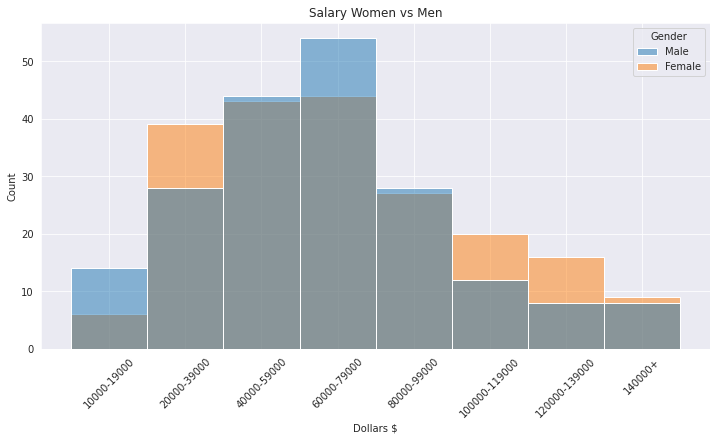

In [ ]:
color = sns.color_palette(as_cmap=True)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df_combine, x = "Salary_Category", hue="Gender", bins=50, ax=ax, element="bars")
ax.set_xlabel('Dollars $')
ax.set_ylabel('Count')
ax.set_title('Salary Women vs Men');
plt.xticks(rotation=45)
fig.show()

# Data Cleaning and Feature Engineering

## Gender One-Hot Encoding

In [ ]:
# one-hot/dummy encoding for Gender
# create Gender_is_Female and Gender_is_Male features

df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender_is')], axis=1) 


## Drop Columns

In [ ]:
# drop 'User ID' column because there is no reason to believe it contains information about the outcome
df = df.drop('User ID', axis=1)

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


# Linear Regression

## Excluding the gender

In [ ]:
# copy of dataframe for linear regression analysis
import statsmodels.formula.api as sm
df_lin_1 = df.copy()

#Initialize the regression model
m = sm.ols('Purchased ~ Age + EstimatedSalary', data = df_lin_1)
m = m.fit()

In [ ]:
df_lin_1['Purchased_predicted'] = m.predict(df_lin_1)
df_lin_1['Purchased_residuals'] = df_lin_1.Purchased_predicted - df_lin_1.Purchased

In [ ]:
df_lin_1.head()

,Gender,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male,Purchased_predicted,Purchased_residuals
0,Male,19,19000,0,0,1,-0.332235,-0.332235
1,Male,35,20000,0,0,1,0.096561,0.096561
2,Female,26,43000,0,1,0,-0.054436,-0.054436
3,Female,27,57000,0,1,0,0.025718,0.025718
4,Male,19,76000,0,0,1,-0.114032,-0.114032


In [ ]:
df_lin_1.describe()

,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male,Purchased_predicted,Purchased_residuals
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,37.655000,69742.500000,0.357500,0.510000,0.490000,0.357500,-2.398129e-13
std,10.482877,34096.960282,0.479864,0.500526,0.500526,0.325338,3.527391e-01
min,18.000000,15000.000000,0.000000,0.000000,0.000000,-0.332235,-8.249851e-01
25%,29.750000,43000.000000,0.000000,0.000000,0.000000,0.127943,-2.602644e-01
50%,37.000000,70000.000000,0.000000,1.000000,0.000000,0.370413,2.548147e-02
75%,46.000000,88000.000000,1.000000,1.000000,1.000000,0.532447,2.870220e-01
max,60.000000,150000.000000,1.000000,1.000000,1.000000,1.204873,9.751854e-01


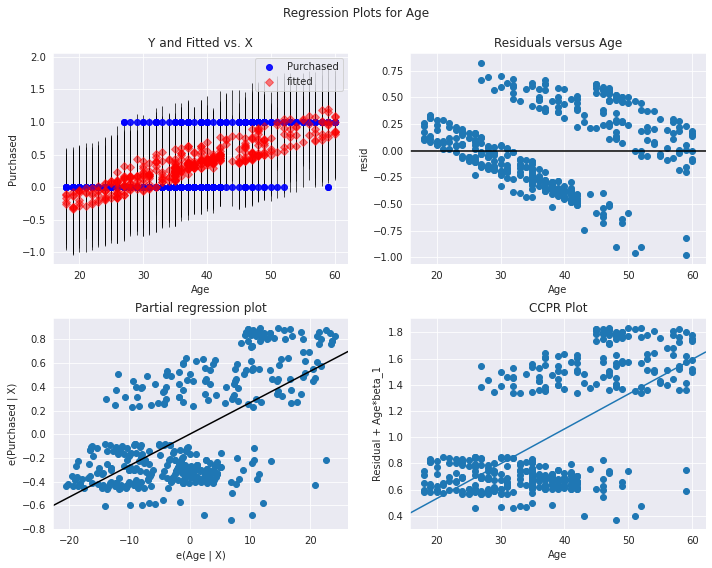

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "Age", fig = fig)

As seen by the top right corner figure, some clusters are observed. The residuals are also not uniformly distributed around the zero x-axis. This indicates that the model might be biased

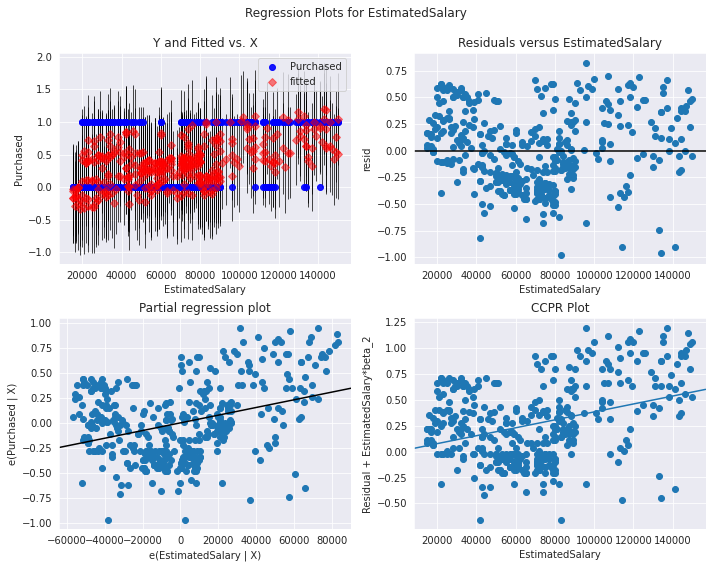

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "EstimatedSalary", fig = fig)

We can see in the top right figure that there are many outliers that can make our model biased. There are also some clusters observed towards the lower salaries.

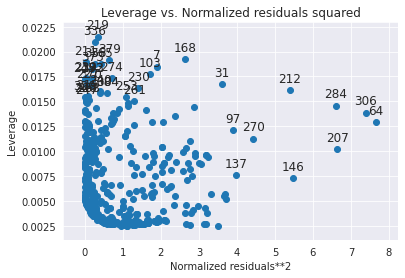

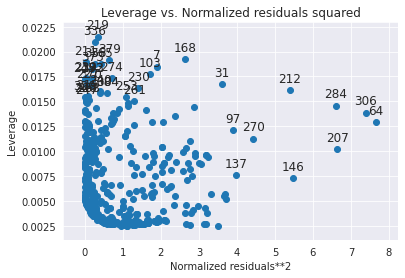

In [ ]:
plot_leverage_resid2(m)

We can see that there are several points with high leverage and are far to the right (outliers), these ones can be problematic to our model. There are some with high leverage but not outliers and these ones should be good.

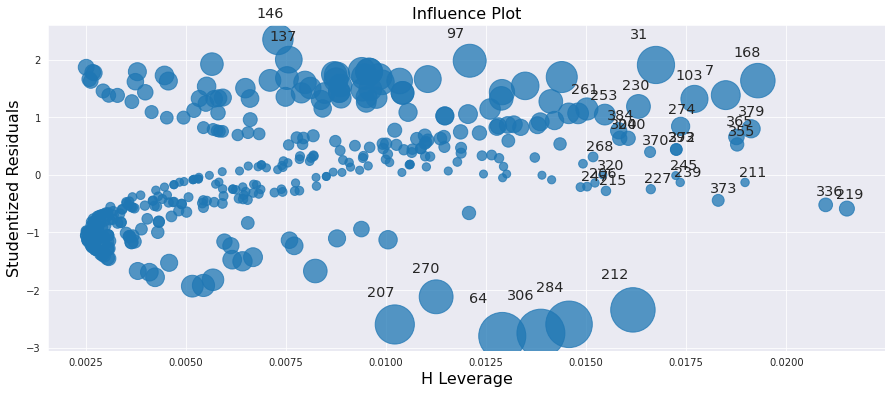

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(m, ax=ax)

There are several points that have big influence on the model (represented by the size of circles) and are outliers (points are located above or below +/-2). Some points also have a combination of the previously mentionned and high leverage which can largly impact our model.


In [ ]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Purchased   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           8.61e-54
Time:                        16:08:09   Log-Likelihood:                -150.26
No. Observations:                 400   AIC:                             306.5
Df Residuals:                     397   BIC:                             318.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9096      0.071    -12.778      0.000      -1.050      -0.770
Age                 0.0266      0.002     15.537      0.000       0.023       0.030
EstimatedSalary  3.828e-06   5.26e-07      7.284      0.000    2.79e-06    4.86e-06
==============================================================================
Omnibus:                       13.406   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.744
Skew:                           0.061   Prob(JB):                       0.0343
Kurtosis:                       2.376   Cond. No.                     3.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted R-squared value is closer to 0 than 1 which indicates a slight weakness in the relationship between independent and dependent variables.
In conclusion, our model displayed many weaknesses and didn't follow all assumptions for a good linear regression model. Thus, another model has to be created.

## Including the gender

In [ ]:
# copy of dataframe for linear regression analysis
df_lin_2 = df.copy()


In [ ]:
df_lin_2.head()

,Gender,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


In [ ]:
#Initialize the regression model
m = sm.ols('Purchased ~ Age + EstimatedSalary + Gender_is_Female + Gender_is_Male', data = df_lin_2)
m = m.fit()

In [ ]:
df_lin_2['Purchased_predicted'] = m.predict(df_lin_2)
df_lin_2['Purchased_residuals'] = df_lin_2.Purchased_predicted - df_lin_2.Purchased

In [ ]:
df_lin_2.head()

,Gender,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male,Purchased_predicted,Purchased_residuals
0,Male,19,19000,0,0,1,-0.325534,-0.325534
1,Male,35,20000,0,0,1,0.104090,0.104090
2,Female,26,43000,0,1,0,-0.063284,-0.063284
3,Female,27,57000,0,1,0,0.017088,0.017088
4,Male,19,76000,0,0,1,-0.106650,-0.106650


In [ ]:
df_lin_2.describe()

,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male,Purchased_predicted,Purchased_residuals
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,37.655000,69742.500000,0.357500,0.510000,0.490000,0.357500,-4.773995e-13
std,10.482877,34096.960282,0.479864,0.500526,0.500526,0.325438,3.526467e-01
min,18.000000,15000.000000,0.000000,0.000000,0.000000,-0.334046,-8.331493e-01
25%,29.750000,43000.000000,0.000000,0.000000,0.000000,0.128421,-2.584581e-01
50%,37.000000,70000.000000,0.000000,1.000000,0.000000,0.371525,2.213135e-02
75%,46.000000,88000.000000,1.000000,1.000000,1.000000,0.531366,2.833377e-01
max,60.000000,150000.000000,1.000000,1.000000,1.000000,1.215094,9.684977e-01


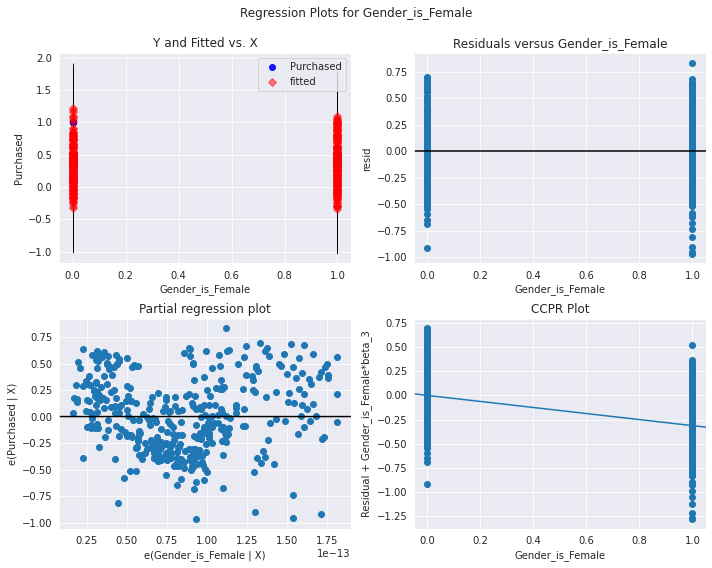

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "Gender_is_Female", fig = fig)

As seen by the top right corner figure, some clusters are observed. The residuals are also not uniformly distributed around the zero x-axis. This indicates that the model might be biased

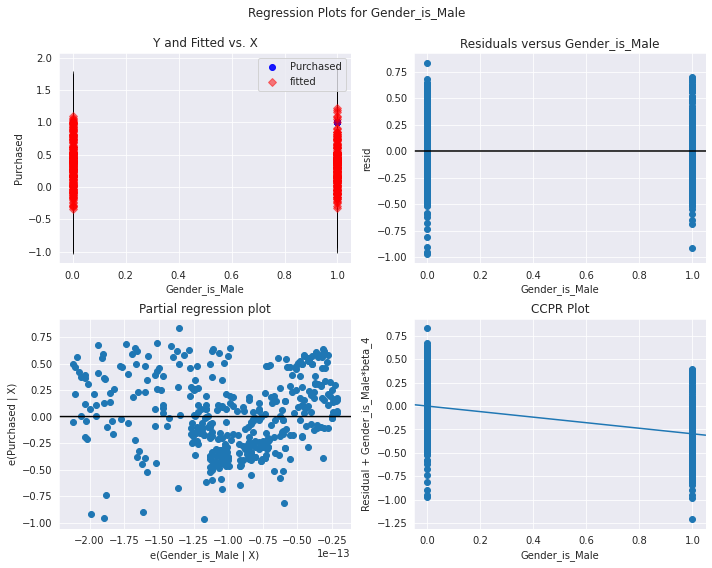

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "Gender_is_Male", fig = fig)

In [ ]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Purchased   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.14e-52
Time:                        16:08:13   Log-Likelihood:                -150.16
No. Observations:                 400   AIC:                             308.3
Df Residuals:                     396   BIC:                             324.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6081      0.048    -12.761      0.000      -0.702      -0.514
Age                  0.0266      0.002     15.518      0.000       0.023       0.030
EstimatedSalary    3.84e-06   5.27e-07      7.290      0.000     2.8e-06    4.88e-06
Gender_is_Female    -0.3122      0.031    -10.123      0.000      -0.373      -0.252
Gender_is_Male      -0.2960      0.029    -10.359      0.000      -0.352      -0.240
==============================================================================
Omnibus:                       14.246   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.998
Skew:                           0.060   Prob(JB):                       0.0302
Kurtosis:                       2.363   Cond. No.                     1.87e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.92e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The adjusted R-square didn't change when adding the gender. This means the model is biased and not accurate using the linear regression

# Logistic Regression

Before we do any classsification modelling, we must first check if our target variable (Purchased) is *balanced* or not

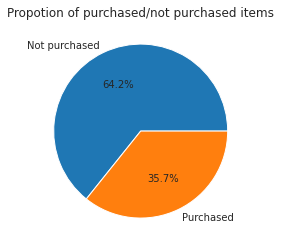

In [ ]:
import statsmodels.api as sm # for logistic regression

df_logistic = df.copy() # setting up dataframe for logistic regression

# Pie chart
label = ['Not purchased', 'Purchased']
plt.pie(df_logistic.Purchased.value_counts()/len(df_logistic.Purchased) , labels = label, autopct='%1.1f%%') # pie chart
plt.title('Propotion of purchased/not purchased items')
plt.show()

There are more customers who have **not** purchased, than purchased. This also means we can't rely on **accuracy** as a good evaluation metric. Metrics such as **precision and recall** must be used to evaluate the model

## Feature engineering

### Age

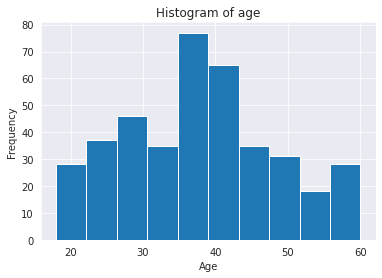

In [ ]:
# histogram of Age
df_logistic.Age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can break down **Age** into various levels to understand the relationship between our target variable and **Age** in more depth.

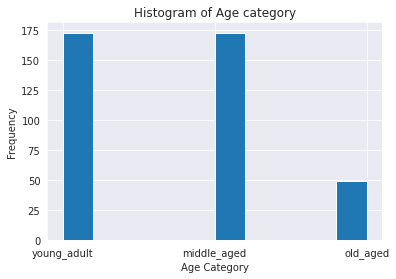

In [ ]:
# binning Age feature
df_logistic['age_cat'] = pd.cut(df_logistic.Age, bins = [18, 35, 50, np.inf], labels = ['young_adult', 'middle_aged', 'old_aged'])
df_logistic['age_cat'].hist()

temp_df = df_logistic.copy() # used later for post-hoc analysis

plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Histogram of Age category')
plt.show()

From this, we can see that most of the partcipants are young to middle adults

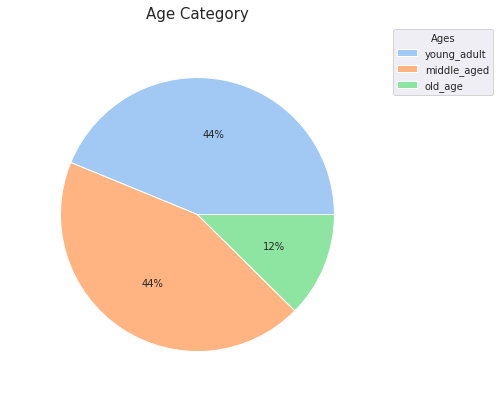

In [ ]:
colors = sns.color_palette('pastel')
label = ['young_adult','middle_aged', 'old_age']
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(df_logistic.age_cat.value_counts(), autopct='%0.0f%%', colors = colors, radius=0.9) # pie chart
ax.legend(label,
          title ="Ages",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0, 1))
 
ax.set_title('Age Category', fontsize= 15, loc= 'center')
plt.show()

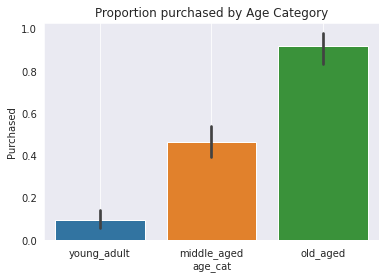

In [ ]:
sns.barplot(data = df_logistic, x = 'age_cat', y = 'Purchased').set_title('Proportion purchased by Age Category')
plt.grid()

Even though old aged people are not the majority in the dataset, we see that they have the most purchases compared to young adults and middle-aged people

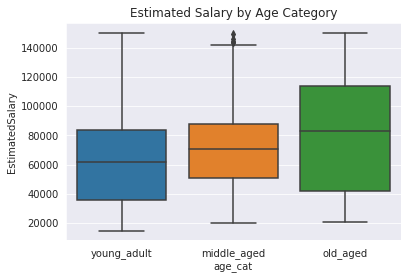

In [ ]:
sns.boxplot(data = df_logistic , x = 'age_cat', y = 'EstimatedSalary').set_title('Estimated Salary by Age Category')
plt.show()

The **Estimated Salary** of all three categories is roughly the same. No new features can be derived from this.

In [ ]:
dummies = pd.get_dummies(df_logistic.age_cat, drop_first= True) # get the dummy varibales for age_cat
# we set drop_first = True becaue when middle_aged = 0 and old_aged = 0, this means we are looking at young_age
# This also avoids the dummy variable trap

df_logistic = pd.concat([df_logistic, dummies], axis = 1) # merging the 2 dataframes together
df_logistic = df_logistic.drop(['age_cat'], axis = 1) # dropping the age_cat varibale since we one-hot-encoded it
df_logistic.head()

,Gender,Age,EstimatedSalary,Purchased,Gender_is_Female,Gender_is_Male,middle_aged,old_aged
0,Male,19,19000,0,0,1,0,0
1,Male,35,20000,0,0,1,0,0
2,Female,26,43000,0,1,0,0,0
3,Female,27,57000,0,1,0,0,0
4,Male,19,76000,0,0,1,0,0


### Gender

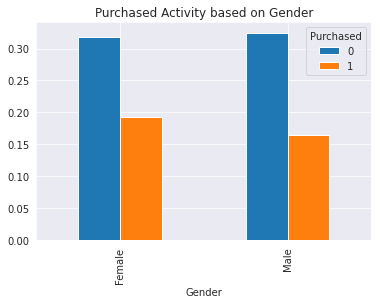

In [ ]:
pd.crosstab(df_logistic.Gender , df_logistic.Purchased, 
            normalize=True).plot(kind='bar')
plt.title('Purchased Activity based on Gender')
plt.show()

We see that the proportions are roughly the same for purchased and non purchased for both genders

In [ ]:
# Gender varibale is one-hot-encoded, so we don't need the varibale
# Gender_is_Female is removed to avoid the dummy variable trap
df_logistic = df_logistic.drop(['Gender', 'Gender_is_Female'], axis = 1) 
df_logistic.head()

,Age,EstimatedSalary,Purchased,Gender_is_Male,middle_aged,old_aged
0,19,19000,0,1,0,0
1,35,20000,0,1,0,0
2,26,43000,0,0,0,0
3,27,57000,0,0,0,0
4,19,76000,0,1,0,0


The features in the dataset are in different units. To make the modelling process easier, we scale each feature using the *Standard Scaler* so they will be in the same units

In [ ]:
# scaling dataframe for logistic regression

scaler = StandardScaler()
predictors = ['Age', 'EstimatedSalary']
df_logistic[predictors] = scaler.fit_transform(df_logistic[predictors])
df_logistic.head()

,Age,EstimatedSalary,Purchased,Gender_is_Male,middle_aged,old_aged
0,-1.781797,-1.490046,0,1,0,0
1,-0.253587,-1.460681,0,1,0,0
2,-1.113206,-0.785290,0,0,0,0
3,-1.017692,-0.374182,0,0,0,0
4,-1.781797,0.183751,0,1,0,0


## Modelling

### Full model (Model 1)

This model will include all the features in our dataset

In [ ]:

predictors = ['Age', 'EstimatedSalary','Gender_is_Male', 'middle_aged',  'old_aged']
X = df_logistic[predictors]
y = df_logistic['Purchased']
X = sm.add_constant(X)
m = sm.Logit(y,X)
result = m.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.339944
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.479     
Dependent Variable: Purchased        AIC:              283.9551  
Date:               2022-04-18 16:08 BIC:              307.9039  
No. Observations:   400              Log-Likelihood:   -135.98   
Df Model:           5                LL-Null:          -260.79   
Df Residuals:       394              LLR p-value:      6.6390e-52
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
const              -0.6888   0.4009 -1.7181 0.0858 -1.4746 0.0970
Age                 3.1981   0.4800  6.6624 0.0000  2.2573 4.1390


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Coefficients such as **Age Category and Gender** are all **less significant**. We can reduce the complexity of our model by eliminating those variables.

### Reduced Model (Model 2)

This model will include only the statistically significant features from our full model

In [ ]:

predictors = [ 'Age', 'EstimatedSalary',]
X = df_logistic[predictors]
y = df_logistic['Purchased']
X = sm.add_constant(X)
m = sm.Logit(y,X)
result = m.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.469     
Dependent Variable: Purchased        AIC:              283.0514  
Date:               2022-04-18 16:08 BIC:              295.0258  
No. Observations:   400              Log-Likelihood:   -138.53   
Df Model:           2                LL-Null:          -260.79   
Df Residuals:       397              LLR p-value:      7.9949e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -1.1381   0.1691 -6.7297 0.0000 -1.4696 -0.8067
Age                2.4446   0.2712  9.0128 0.0000  1.9130  2.9762


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The main variables that are needed for predicting whether someone purchased or not are Age and their Estimated Salary.

### Feature Selection Model (Model 3)

This model will include a subset of feature that are selected by recursive feature elimination (RFE)

In [ ]:
predictors = ['Age', 'EstimatedSalary','Gender_is_Male', 'middle_aged',  'old_aged']
X = df_logistic[predictors]
y = df_logistic['Purchased']

for i in range(1,len(predictors)+1):
  estimator = LogisticRegression(penalty='none') # same as statsmodels logistic regression WITHOUT intercept 
  selector = RFE(estimator,n_features_to_select=i) 
  selector = selector.fit(X, y)
  index_of_best_features = np.where(selector.support_)[0]
  print('If we want', i, 'features in our model, we should include: ',X.iloc[:, index_of_best_features].columns.tolist())



If we want 1 features in our model, we should include:  ['Age']
If we want 2 features in our model, we should include:  ['Age', 'EstimatedSalary']
If we want 3 features in our model, we should include:  ['Age', 'EstimatedSalary', 'old_aged']
If we want 4 features in our model, we should include:  ['Age', 'EstimatedSalary', 'middle_aged', 'old_aged']
If we want 5 features in our model, we should include:  ['Age', 'EstimatedSalary', 'Gender_is_Male', 'middle_aged', 'old_aged']


In [ ]:
# ideal model based on RFE feature selection method

predictors = ['Age', 'EstimatedSalary', 'middle_aged',  'old_aged']
X = df_logistic[predictors]
y = df_logistic['Purchased']
m = sm.Logit(y,X)
result = m.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.344054
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.472     
Dependent Variable: Purchased        AIC:              283.2433  
Date:               2022-04-18 16:08 BIC:              299.2092  
No. Observations:   400              Log-Likelihood:   -137.62   
Df Model:           3                LL-Null:          -260.79   
Df Residuals:       396              LLR p-value:      4.0705e-53
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                3.5437   0.3983  8.8973 0.0000  2.7630  4.3243
EstimatedSalary    1.2902   0.1885  6.8444 0.0000  0.9208  1.6597


### Another Model (all inputs, without age bins)

In [ ]:
# logistic regression with scaled age, estimated salary, and gender as input features

df_logistic_2 = df.copy()

predictors = ['Age', 'EstimatedSalary','Gender_is_Male']
X = df_logistic_2[predictors]
y = df_logistic_2['Purchased']
m = sm.Logit(y,X)
result = m.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.665320
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.020  
Dependent Variable: Purchased        AIC:              538.2557
Date:               2022-04-18 16:08 BIC:              550.2301
No. Observations:   400              Log-Likelihood:   -266.13 
Df Model:           2                LL-Null:          -260.79 
Df Residuals:       397              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Age              0.0023   0.0059  0.3931 0.6942 -0.0093  0.0139
EstimatedSalary  0.0000   0.0000  0.2035 0.8387 -0.0000  0.0000
Gender_is_Male  -0.8028   0

Poor pseudo R-squared value, and the higher AIC/BIC values as compared to "Final Model" indicates that "Final Model" is less complex but still a good fit for the data.

## Final Model

In [ ]:
# The ideal model for our logistic regression would have the predictors 
# ['Age', 'EstimatedSalary', 'middle_aged',  'old_aged'] WITHOUT the intercept present

predictors = ['Age', 'EstimatedSalary', 'middle_aged',  'old_aged']
X = df_logistic[predictors]
y = df_logistic['Purchased']
m = sm.Logit(y,X)
result = m.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.344054
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.472     
Dependent Variable: Purchased        AIC:              283.2433  
Date:               2022-04-18 16:08 BIC:              299.2092  
No. Observations:   400              Log-Likelihood:   -137.62   
Df Model:           3                LL-Null:          -260.79   
Df Residuals:       396              LLR p-value:      4.0705e-53
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                3.5437   0.3983  8.8973 0.0000  2.7630  4.3243
EstimatedSalary    1.2902   0.1885  6.8444 0.0000  0.9208  1.6597


### Evaluate model

In [ ]:
# derive estimates of the odds
df_logistic['p'] = result.predict(df_logistic[predictors])


In [ ]:
df_logistic

,Age,EstimatedSalary,Purchased,Gender_is_Male,middle_aged,old_aged,p
0,-1.781797,-1.490046,0,1,0,0,0.000265
1,-0.253587,-1.460681,0,1,0,0,0.058236
2,-1.113206,-0.785290,0,0,0,0,0.006978
3,-1.017692,-0.374182,0,0,0,0,0.016478
4,-1.781797,0.183751,0,1,0,0,0.002290
...,...,...,...,...,...,...,...
395,0.797057,-0.844019,1,0,1,0,0.516920
396,1.274623,-1.372587,1,1,0,1,0.390540
397,1.179110,-1.460681,1,0,1,0,0.651567
398,-0.158074,-1.078938,0,1,1,0,0.026083


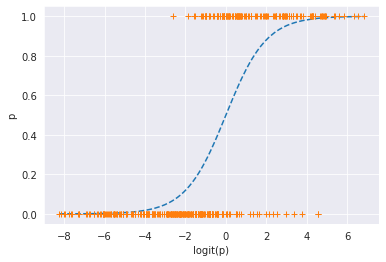

In [ ]:
# plot relationship between values of Logit(p) and the odds p along with the actual values

df_logistic = df_logistic.sort_values(by = ['p'], axis = 0)
plt.plot(logit(df_logistic.p), df_logistic.p, '--')
plt.plot(logit(df_logistic.p), df_logistic.Purchased, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


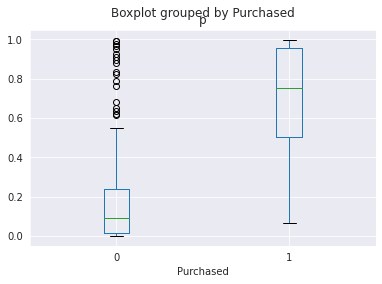

In [ ]:
# Plot a boxplot to see distribtuion of the estimated odds for both values of the actual response
df_logistic.boxplot(column='p', by = 'Purchased')
plt.show();

In [ ]:
# derive binary estimate of y_hat of the response y
df_logistic['yhat'] = (df_logistic.p > 0.5) * 1
df_logistic.yhat.value_counts()

0    270
1    130
Name: yhat, dtype: int64

In [ ]:
# confusion matrix

conf_mat = result.pred_table()
print(conf_mat)

[[234.  23.]
 [ 36. 107.]]


In [ ]:
pd.crosstab(df_logistic.Purchased, df_logistic.yhat)

yhat,0,1
Purchased,,
0,234,23
1,36,107


From the confusion matrix, see 234 cases where no purchase was correctly estimated and 107 cases wehre the purchase was correctly estimated. The remaining 36 + 23 estimates were incorrect.

In [ ]:
# extract TP (true positives), FP (false positives), FN (false negatives) and TP (true positives)

tn, fp, fn, tp = conf_mat.flatten()
print (tn, fp, fn, tp)

# calculate accuracy

acc = (tp + tn) / np.sum(conf_mat)
print ("Accuracy of the model is: %1.2f" % acc)

# calculate MCC

mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Matthews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

# calculate precision, recall and specificity
prc = tp / (tp + fp)
rec = tp / (tp + fn)
spec = tn / (tn + fp)
print ("Model's precision is %1.2f, its recall (sensitivity) is %1.2f, and its specificity is %1.2f" % (prc, rec, spec))

# calculate F1-score
f1 = 2 * (prc * rec) / (prc + rec)
print ("F1-score of the model is: %1.2f" % f1)

234.0 23.0 36.0 107.0
Accuracy of the model is: 0.85
Matthews correlation coefficient between the estimates and the true response is: 0.67
Model's precision is 0.82, its recall (sensitivity) is 0.75, and its specificity is 0.91
F1-score of the model is: 0.78


As noted above, the dataset is not fully balanced, so we cannot rely on accuracy metric alone since the dataset is partially unbalanced.

In [ ]:
# generate ROC curve

# Set discrimination thresholds
ths = np.arange(0., 1.0, 0.025)

# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

# Main loop
for th in ths:
    # Generate estimates
    conf_mat = result.pred_table(threshold=th)
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
# Bind all the numbers together
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")

In [ ]:
roc

,discret_thr,sensitivity,specificity,_specificity,accuracy,matthews
39,0.975,0.181818,0.988327,0.011673,0.7000,0.314462
38,0.950,0.272727,0.980545,0.019455,0.7275,0.387945
37,0.925,0.342657,0.976654,0.023346,0.7500,0.444383
36,0.900,0.384615,0.972763,0.027237,0.7625,0.473269
35,0.875,0.412587,0.964981,0.035019,0.7675,0.481733
34,0.850,0.440559,0.964981,0.035019,0.7775,0.505900
33,0.825,0.447552,0.961089,0.038911,0.7775,0.504374
32,0.800,0.468531,0.957198,0.042802,0.7825,0.514984
31,0.775,0.475524,0.953307,0.046693,0.7825,0.513809
28,0.700,0.538462,0.949416,0.050584,0.8025,0.559943


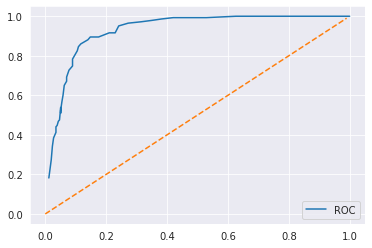

In [ ]:
# plot ROC curve
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)
plt.show()

In [ ]:
# calculate AUC by integrating the sensitivity as a function of 1 - specificity.
auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.93


With an area under the curve of > 0.5, the model performs better than a random estimator.

In [ ]:
# identify the threshold corresponding to the balanced sensitivity and specificity
# Where threshold equal 0.5 (point corresponding to the default discrimination threshold)
idx_default_th = np.where(roc.discret_thr == 0.5)[0][0]

# Max sum of spec and sens (maximizes sum of sensitivity and specificity)
idx_youdensj = np.argmax(roc.sensitivity + roc.specificity)

 # Balanced spec and sens (where model's sensitivity is equal to its specificity)
idx_ballance = np.argmin(np.abs(roc.sensitivity - roc.specificity))

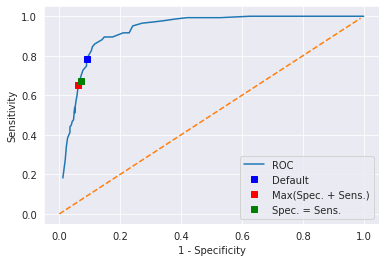

In [ ]:
# highlight the point corresponding to the selected thresholds within the ROC curve
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')


plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

Points where model's sensitivity is equal to its specificity (green), maximizes sum of sensitivity and specificity (red), and corresponding to default distribution threshold (d_th = 0.5) are illustrated on the ROC curve above.


In [ ]:
#  confusion matrix at different points of the ROC curve
result.pred_table(threshold=roc.discret_thr[idx_youdensj])

array([[241.,  16.],
       [ 50.,  93.]])

In [ ]:
result.pred_table(threshold=roc.discret_thr[idx_ballance])

array([[239.,  18.],
       [ 47.,  96.]])

In [ ]:
# calculate Youden's J.
J = max(roc.sensitivity + roc.specificity - 1)
print ('Youden\'s J = %1.2f' % J)

Youden's J = 0.75


### Post-hoc Analysis 

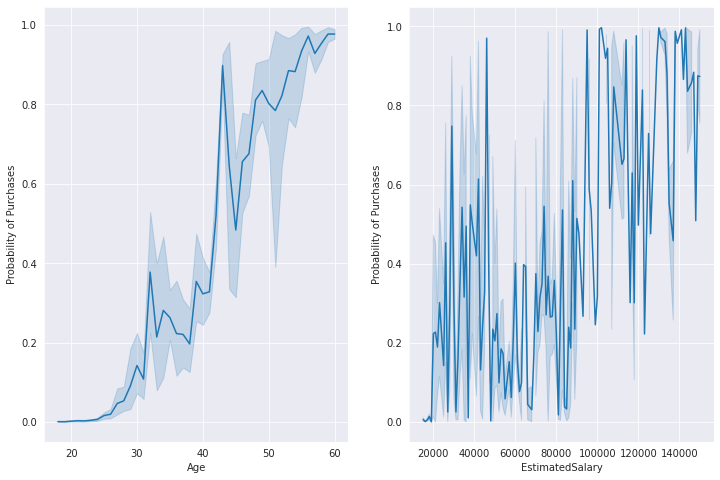

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
post_hoc_df = pd.DataFrame({'Age': df['Age']})
post_hoc_df['prob_of_purchase'] = df_logistic['p']
post_hoc_df['EstimatedSalary'] = df['EstimatedSalary']
sns.lineplot(x = 'Age', y = 'prob_of_purchase' , data = post_hoc_df, ax=ax[0])
ax[0].set_ylabel("Probability of Purchases")
sns.lineplot(x = 'EstimatedSalary', y = 'prob_of_purchase' , data = post_hoc_df, ax=ax[1])
ax[1].set_ylabel("Probability of Purchases")
fig.show()

In [ ]:
post_hoc_df.corr()

,Age,prob_of_purchase,EstimatedSalary
Age,1.000000,0.852254,0.155238
prob_of_purchase,0.852254,1.000000,0.495758
EstimatedSalary,0.155238,0.495758,1.000000


As you can see, there is a ***strong*** correlation between the probability of purchases and Age. There is a ***moderate*** correlation between ones estimated salary and purchases

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


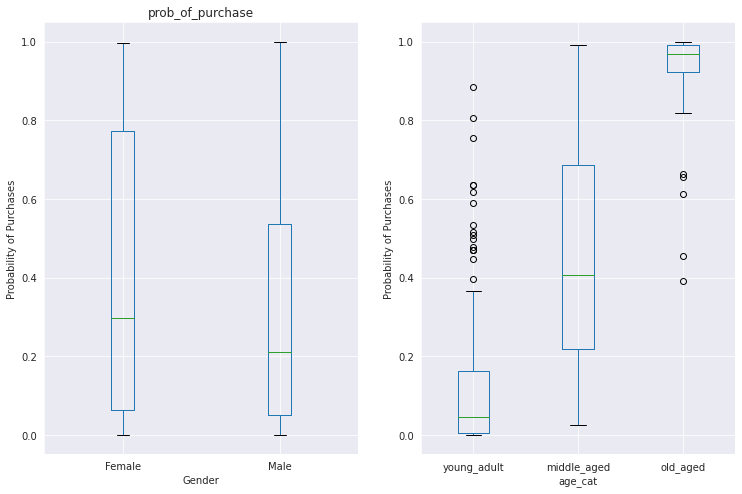

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
post_hoc_df['Gender'] = temp_df['Gender']
post_hoc_df['age_cat'] = temp_df['age_cat']
#post_hoc_df
a1 = post_hoc_df.boxplot(by='Gender', column = 'prob_of_purchase' ,ax = ax[0],
                         return_type='axes')
a1[0].set_ylabel('Probability of Purchases')

a2 = post_hoc_df.boxplot(by='age_cat', column = 'prob_of_purchase' ,ax = ax[1],
                         return_type='axes')
a2[0].set_ylabel('Probability of Purchases')
a2[0].set_title('')
plt.suptitle('')
plt.show()

This confirms our initial hypothesis that Gender does not influence purchases, however, age (and age category) does